#  Naive bayes theorm
# https://www.youtube.com/watch?v=l3dZ6ZNFjo0&t=2196s
#### P(A/B) = P(B/A)*P(A)/P(B)
### use of naive base theorm 1.spam categorization, weather prediction, face recognition, news classification, face
### recognition, speech recognition


In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn import metrics 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = fetch_20newsgroups()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
print(data.data.head(5))

In [5]:
X = data.data
y=data.target
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)
model_naive = make_pipeline(TfidfVectorizer(),MultinomialNB())
model_naive.fit(X_train,y_train)
y_pred = model_naive.predict(X_test)

In [5]:
print(y_pred)

[14  6 15 ..., 11 17 16]


In [150]:
print(metrics.accuracy_score(y_test,y_pred))

0.822974963181


Text(33,0.5,'Predicted Label')

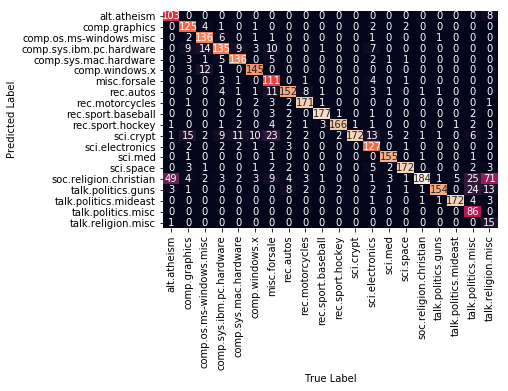

In [151]:
## lets print the confusion metric heatmap
conf_mat = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat.T,annot=True,fmt='d',cbar=False,xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [14]:
#  n=model_naive.predict(['Your tone implies that you are unlikely to believe me--indeed,'])
# data.target_names[n[0]]

## creating a function which will take a statment(list) and return its type or category
def newsCategory(lis):
    n=model_naive.predict([lis])
    print(data.target_names[n[0]])

newsCategory('jesus christ') ##soc.religion.christian
newsCategory('most of the bike now having 150cc engines')## rec.motorcycles
newsCategory('prime minister of india is a good guy?')
newsCategory('NASA and tesla is sending humans to machine')
    
newsCategory("prime minister")


soc.religion.christian
rec.motorcycles
talk.politics.mideast
sci.space
talk.politics.mideast


# naive base theorm on diabetic data

In [154]:
data_2 = pd.read_csv("Diabetes.csv",header=0)
data_2.rename(columns={' Number of times pregnant':'Number of times pregnant', ' Plasma glucose concentration':'Plasma glucose concentration',
       ' Diastolic blood pressure':'Diastolic blood pressure', ' Triceps skin fold thickness':'Triceps skin fold thickness',
       ' 2-Hour serum insulin':'2-Hour serum insulin', ' Body mass index':'Body mass index',
       ' Diabetes pedigree function':'Diabetes pedigree function', ' Age (years)':'Age', ' Class variable':'Class variable'},inplace=True)
X_2=data_2[['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age']]
y_2 = data_2['Class variable']
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_2,y_2,test_size=0.3,random_state=2)


In [156]:
model_naive2 = MultinomialNB()
model_naive2.fit(X_train_2,y_train_2)
y_pred_2 = model_naive2.predict(X_test_2)
print(metrics.accuracy_score(y_test_2,y_pred_2))
## Clearly we got 74% accuracy with random forest but we are getting 60% with naive so we cant use this 
## algorithm

0.601731601732


### http://localhost:8888/notebooks/Jupyter_Learnign/Jupyter_Learnign/Untitled1.ipynb#spam-detection ##